In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('eth.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-01,749.201843,719.792236,737.708374,730.367554,13652004358,730.367554
1,2021-01-02,786.798462,718.109497,730.402649,774.534973,19740771179,774.534973
2,2021-01-03,1006.565002,771.561646,774.511841,975.507690,45200463368,975.507690
3,2021-01-04,1153.189209,912.305359,977.058838,1040.233032,56945985763,1040.233032
4,2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,41535932781,1100.006104


In [3]:
# Transformar coluna "Date" em datetime
df['Date'] = pd.to_datetime(df['Date'])

# Utilizar tal coluna como o índice das linhas do DataFrame
eth = df.set_index('Date')

# Mostrar 5 primeiras linhas para verificar se funcionou
eth.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,749.201843,719.792236,737.708374,730.367554,13652004358,730.367554
2021-01-02,786.798462,718.109497,730.402649,774.534973,19740771179,774.534973
2021-01-03,1006.565002,771.561646,774.511841,975.507690,45200463368,975.507690
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,56945985763,1040.233032
2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,41535932781,1100.006104


In [48]:
eth.describe()

,High,Low,Open,Close,Volume,Adj Close
count,594.000000,594.000000,594.000000,594.000000,5.940000e+02,594.000000
mean,2699.359157,2514.801719,2613.116414,2614.361507,2.326725e+10,2614.361507
std,976.867926,933.278093,957.401187,953.823946,1.111569e+10,953.823946
min,749.201843,718.109497,730.402649,730.367554,6.532997e+09,730.367554
25%,1861.746429,1753.405823,1817.912537,1818.139343,1.600126e+10,1818.139343
50%,2677.747681,2501.157715,2592.635620,2593.890381,2.022428e+10,2593.890381
75%,3363.075439,3178.882690,3276.430359,3278.882324,2.743469e+10,3278.882324
max,4891.704590,4718.039062,4810.071289,4812.087402,8.448291e+10,4812.087402


In [4]:
DSR = eth.pct_change(1)

In [49]:
eth.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.991998,0.996569,0.994970,-0.105486,0.994970
Low,0.991998,1.000000,0.992536,0.995364,-0.190603,0.995364
Open,0.996569,0.992536,1.000000,0.990128,-0.132727,0.990128
Close,0.994970,0.995364,0.990128,1.000000,-0.144712,1.000000
Volume,-0.105486,-0.190603,-0.132727,-0.144712,1.000000,-0.144712
Adj Close,0.994970,0.995364,0.990128,1.000000,-0.144712,1.000000


<AxesSubplot:>

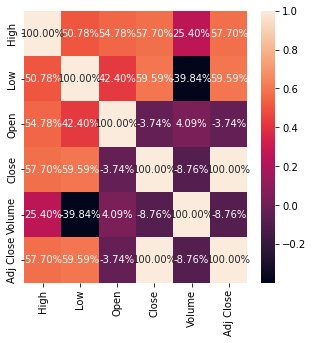

In [5]:
plt.subplots(figsize= (5,5))
sns.heatmap(DSR.corr(), annot= True, fmt= '.2%')

In [9]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = eth.pct_change().dropna(axis=0)
#view the first 5 rows of the data frame
returns.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-02,0.050182,-0.002338,-0.009903,0.060473,0.445998,0.060473
2021-01-03,0.279317,0.074435,0.060390,0.259475,1.289701,0.259475
2021-01-04,0.145668,0.182414,0.261516,0.066350,0.259854,0.066350
2021-01-05,-0.020654,0.081668,0.065953,0.057461,-0.270608,0.057461
2021-01-06,0.070886,0.078457,0.057135,0.097369,0.076175,0.097369


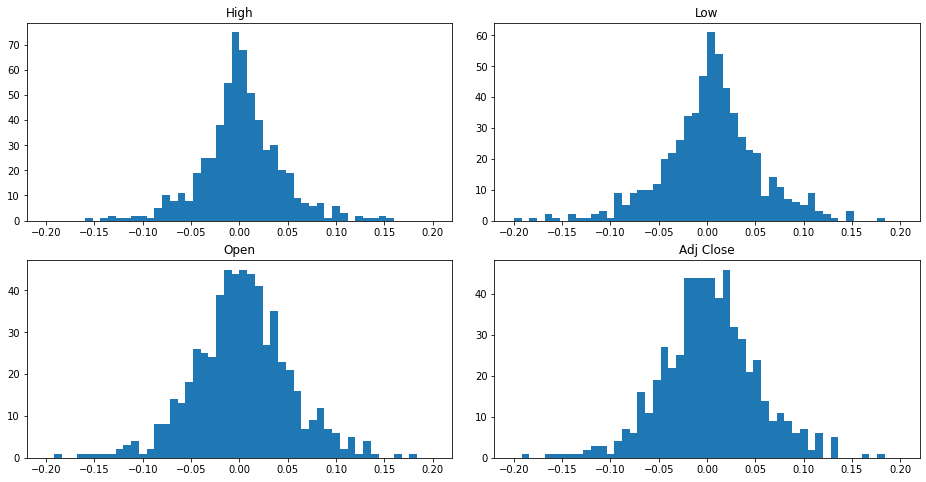

In [11]:
#ploting the histogram
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].hist(returns['High'], bins=50, range=(-0.2, 0.2))
axs[0,0].set_title('High')
axs[0,1].hist(returns['Low'], bins=50, range=(-0.2, 0.2))
axs[0,1].set_title('Low')
axs[1,0].hist(returns['Open'], bins=50, range=(-0.2, 0.2))
axs[1,0].set_title('Open')
axs[1,1].hist(returns['Adj Close'], bins=50, range=(-0.2, 0.2))
axs[1,1].set_title('Adj Close')
plt.show()

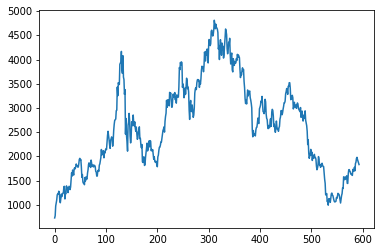

In [33]:
plt.plot(eth['Adj Close'])

<AxesSubplot:xlabel='Date'>

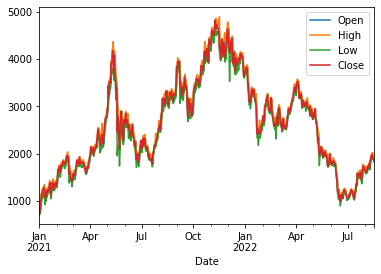

In [7]:
eth[['Open', 'High', 'Low', 'Close']].plot()

In [9]:
eth.isnull()
eth.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [10]:
# Verificando dados sujos
sujos_eth = eth['Volume'] == 0
sujos_eth.sum()

0

In [11]:
def treino_teste(dados):
    # Definir quantos porcento queremos pra treino
    pct_treino = 0.75
    
    # Definir o primeiro dia, o último e o total de dias nos nossos dados
    primeiro_dia = min(dados.index)
    ultimo_dia = max(dados.index)
    total_dias = (ultimo_dia - primeiro_dia).days
    
    # "Dias de treino, dias de glória" - Charlie Brown Jr
    dias_treino = np.ceil(total_dias * pct_treino)
    dias_teste = np.floor(total_dias * (1 - pct_treino))
    
    # Data em que o treino deve parar
    data_parada = primeiro_dia + timedelta(days=dias_treino)
    
    # Dividir o dataset usando a data de parada do treino
    dados_treino = dados[:data_parada] # do começo à data de parada
    dados_teste = dados[data_parada:] # da data de parada ao final
    
    return dados_treino, dados_teste

In [12]:
def AF(X, y):
    
    # Criando lista com as médias
    y_hat_AF = []
    for i in range(len(y)):
        y_hat_AF.append(np.mean(X))
        
    # Transformando em Pandas Series
    y_hat_AF = pd.Series(y_hat_AF, index=y.index)
    return y_hat_AF

In [18]:
# Separando dados de treino, teste e data de parada
X_eth, y_eth = treino_teste(eth['Close'])    

In [19]:
# Prevendo dados futuros com a função
y_hat_AF_eth = AF(X_eth, y_eth)

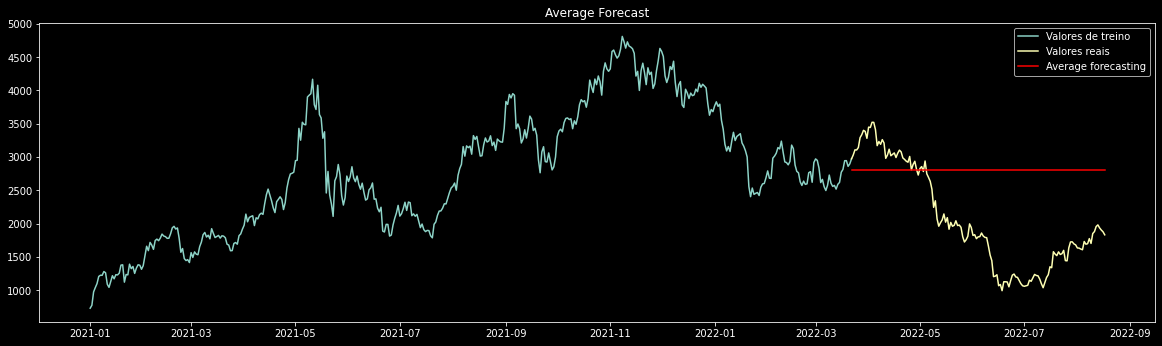

In [21]:
# Gerando gráfico com fundo escuro
with plt.style.context('dark_background'):
    plt.figure(figsize=(20, 5.5))
    plt.title("Average Forecast")
    
    # Dados reais
    plt.plot(X_eth, label='Valores de treino')
    plt.plot(y_eth, label='Valores reais')
    
    # Predições
    plt.plot(y_hat_AF_eth, label='Average forecasting', color='red')
    
    plt.legend()
    plt.show()

In [22]:
# Vamos começar criando uma função que retorna o y para o modelo DF:
def DF(X, y):
    y_t = X[-1]
    m = (y_t - X[0]) / len(X)
    h = np.linspace(0,len(y.index)-1, len(y.index))
    
    # Criando lista com o resultado da fórmula
    y_hat_DF = []
    for i in range(len(y.index)):
        y_hat_DF.append(y_t + m * h[i])
    
    # Transformando em Pandas Series
    y_hat_DF = pd.Series(y_hat_DF, index=y.index)
    return y_hat_DF

In [23]:
# Prevendo dados futuros com a função
y_hat_DF_eth = DF(X_eth, y_eth)

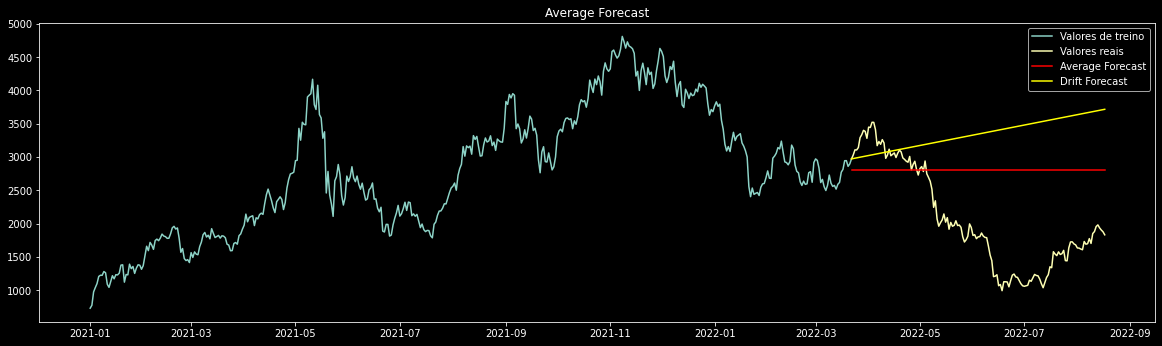

In [24]:
# Gerando gráfico com fundo escuro
with plt.style.context('dark_background'):
    plt.figure(figsize=(20, 5.5))
    plt.title("Average Forecast")
    
    # Dados reais
    plt.plot(X_eth, label='Valores de treino')
    plt.plot(y_eth, label='Valores reais')
    
    # Predições
    plt.plot(y_hat_AF_eth, label='Average Forecast', color='red')
    plt.plot(y_hat_DF_eth, label='Drift Forecast', color='Yellow')
    
    plt.legend()
    plt.show()

In [ ]:
# Moving Average

In [25]:
def SMA(dados, day):
    y_hat_SMA = dados['Close'].rolling(window=day).mean()
    return y_hat_SMA

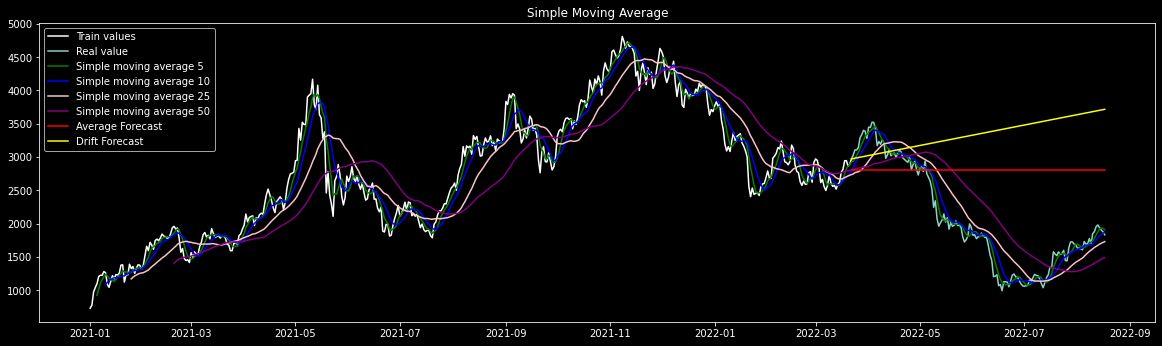

In [26]:
days = [5, 10, 25, 50]
colors = ['green', 'blue', 'pink', 'purple']

# Gerando gráfico com fundo escuro 
with plt.style.context('dark_background'):
    # Configurações básicas
    plt.figure(figsize=(20, 5.5))
    plt.title("Simple Moving Average")
    
    # Dados reais
    plt.plot(X_eth, label='Train values', color='white')
    plt.plot(y_eth, label='Real value')
    
    # Moving average
    for i, day in enumerate(days):
        y_hat_SMA_eth = SMA(eth, day)
        plt.plot(y_hat_SMA_eth, label='Simple moving average '+str(day), color=colors[i])
        
    # Previsões anteriores        
    plt.plot(y_hat_AF_eth, label='Average Forecast', color='red')
    plt.plot(y_hat_DF_eth, label='Drift Forecast', color='Yellow')
    
    # Configurações básicas
    plt.legend()
    plt.show()

In [ ]:
# Cumulative moving average

In [27]:
#O CMA calcula uma composição de moving averages.

def CMA(dados, day):
    y_hat_CMA = dados['Close'].expanding(min_periods=day).mean()
    return y_hat_CMA

In [28]:
# Capturando curva com a função
y_hat_CMA_eth = CMA(eth, 5)

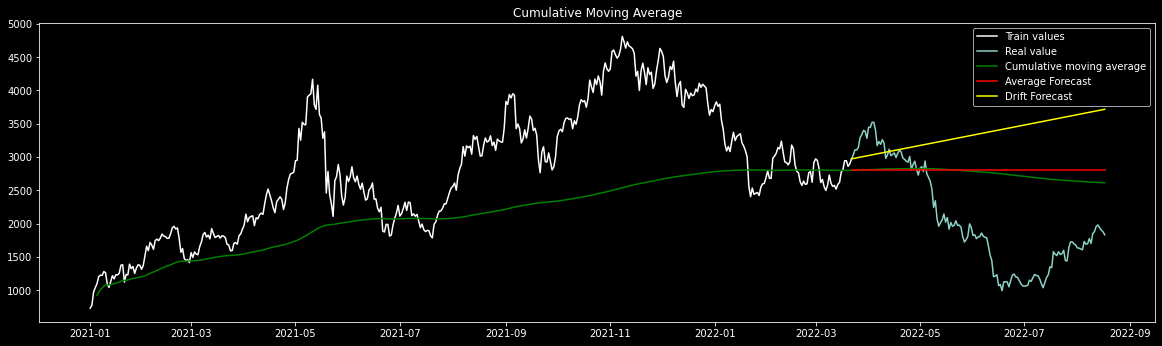

In [29]:
days = [5, 10, 25, 50]
colors = ['green', 'blue', 'pink', 'purple']

# Gerando gráfico com fundo escuro     
with plt.style.context('dark_background'):
    # Configurações básicas
    plt.figure(figsize=(20, 5.5))
    plt.title("Cumulative Moving Average")
    
    # Dados reais
    plt.plot(X_eth, label='Train values', color='white')
    plt.plot(y_eth, label='Real value')
    
    # Moving average
    plt.plot(y_hat_CMA_eth, label='Cumulative moving average', color='green')
    
    # Previsões
    plt.plot(y_hat_AF_eth, label='Average Forecast', color='red')
    plt.plot(y_hat_DF_eth, label='Drift Forecast', color='Yellow')

    # Configurações básicas
    plt.legend()
    plt.show()

In [ ]:
# Fonte: https://www.letscode.com.br/blog/python-para-financas-analise-de-series-temporais